<a href="https://colab.research.google.com/github/hilmimughid/PCVK_Ganjil_2023/blob/main/Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama: Hilmi Mughid**

# **Kelas: TI-3C**

# **No. Absen: 09**

# **NIM: 2141720081**

# **D. Praktikum**

## 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut

In [2]:
!pip install pytesseract

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

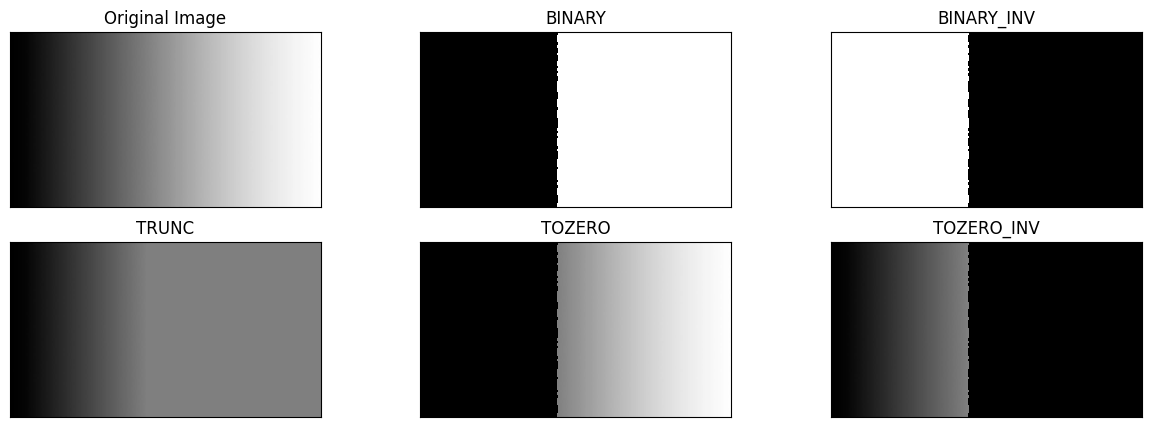

In [15]:
# Menentukan path dari gambar
path = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
# Membaca gambar
img = cv2.imread(path)
# Menentukan nilai threshold
thresh = 127

# Melakukan thresholding dengan berbagai jenis metode
# cv2.THRESH_BINARY: jika intensitas pixel > threshold, maka pixel tersebut menjadi putih, dan sebaliknya
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
# cv2.THRESH_BINARY_INV: kebalikan dari cv2.THRESH_BINARY
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)
# cv2.THRESH_TRUNC: jika intensitas pixel > threshold, maka pixel tersebut menjadi threshold, jika tidak maka tetap
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)
# cv2.THRESH_TOZERO: jika intensitas pixel > threshold, maka pixel tersebut tetap, jika tidak maka menjadi hitam
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)
# cv2.THRESH_TOZERO_INV: kebalikan dari cv2.THRESH_TOZERO
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

# Menentukan judul untuk setiap gambar
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']

# Menyimpan gambar ke dalam list
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Membuat figure
plt.figure(figsize = (15,5))

# Menampilkan setiap gambar
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

# Menampilkan semua gambar
plt.show()

## 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


Nilai threshold dari Otsu's Thresholding: 171


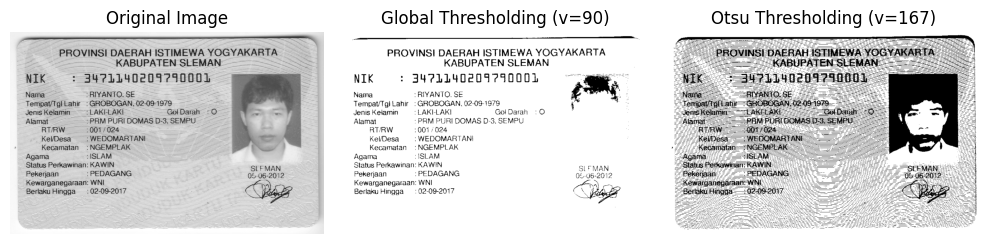

In [16]:
# Fungsi untuk melakukan thresholding global
def global_thresholding(image, threshold):
    # Membuat gambar biner dengan ukuran yang sama dengan gambar asli
    binary = np.zeros_like(image)
    # Mengubah nilai pixel yang lebih besar dari threshold menjadi 255 (putih)
    binary[image > threshold] = 255
    return binary

# Fungsi untuk melakukan thresholding Otsu
def otsu_thresholding(image):
    # Menghitung histogram dari gambar
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    # Normalisasi histogram
    hist /= hist.sum()
    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        # Menghitung bobot latar belakang dan latar depan
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        # Menghitung mean latar belakang dan latar depan
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        # Menghitung varians antar kelas
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        # Menyimpan nilai threshold yang menghasilkan varians antar kelas maksimum
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t
    return threshold

# Membaca gambar dan mengubahnya menjadi grayscale
path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'
image = np.array(Image.open(path).convert("L"))

# Melakukan thresholding global dan Otsu
global_threshold = global_thresholding(image, 90)
otsu_threshold = otsu_thresholding(image)

# Menampilkan gambar asli, hasil thresholding global, dan hasil thresholding Otsu
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)

plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')
plt.subplot(1, 3, 3)

otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding (v=167)')
plt.axis('off')

# Menampilkan nilai threshold dari Otsu's Thresholding
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)
plt.tight_layout()
plt.show()

## 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

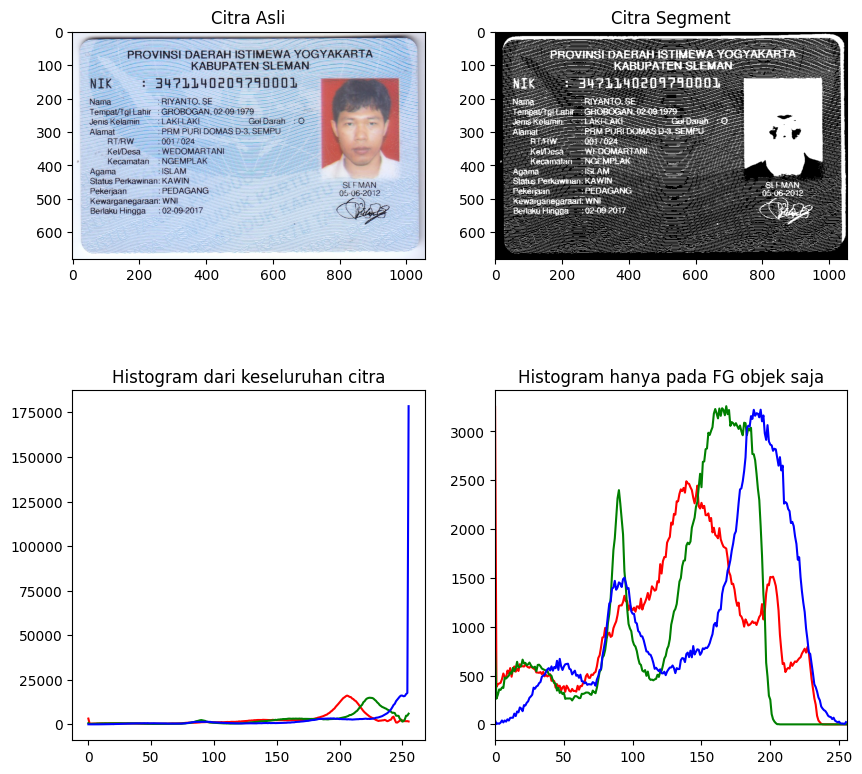

In [17]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')
# Mengubah gambar dari BGR ke RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Mengubah gambar RGB ke grayscale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Melakukan thresholding biner terbalik pada gambar grayscale
# Pixel dengan intensitas > 200 menjadi hitam (0), dan sisanya menjadi putih (255)
ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

# Membuat figure
plt.figure(figsize = (10,10))
# Menampilkan gambar asli
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
# Menampilkan gambar hasil segmentasi
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')

# Menentukan warna untuk setiap channel
color = ('r','g','b')

# Menghitung dan menampilkan histogram untuk setiap channel
for i,col in enumerate(color):
    # Menghitung histogram dari keseluruhan citra
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    # Menghitung histogram hanya pada foreground objek saja
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

# Menampilkan semua plot
plt.show()

## 6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)


(<Axes: >, <matplotlib.image.AxesImage at 0x7b35ccd23340>)

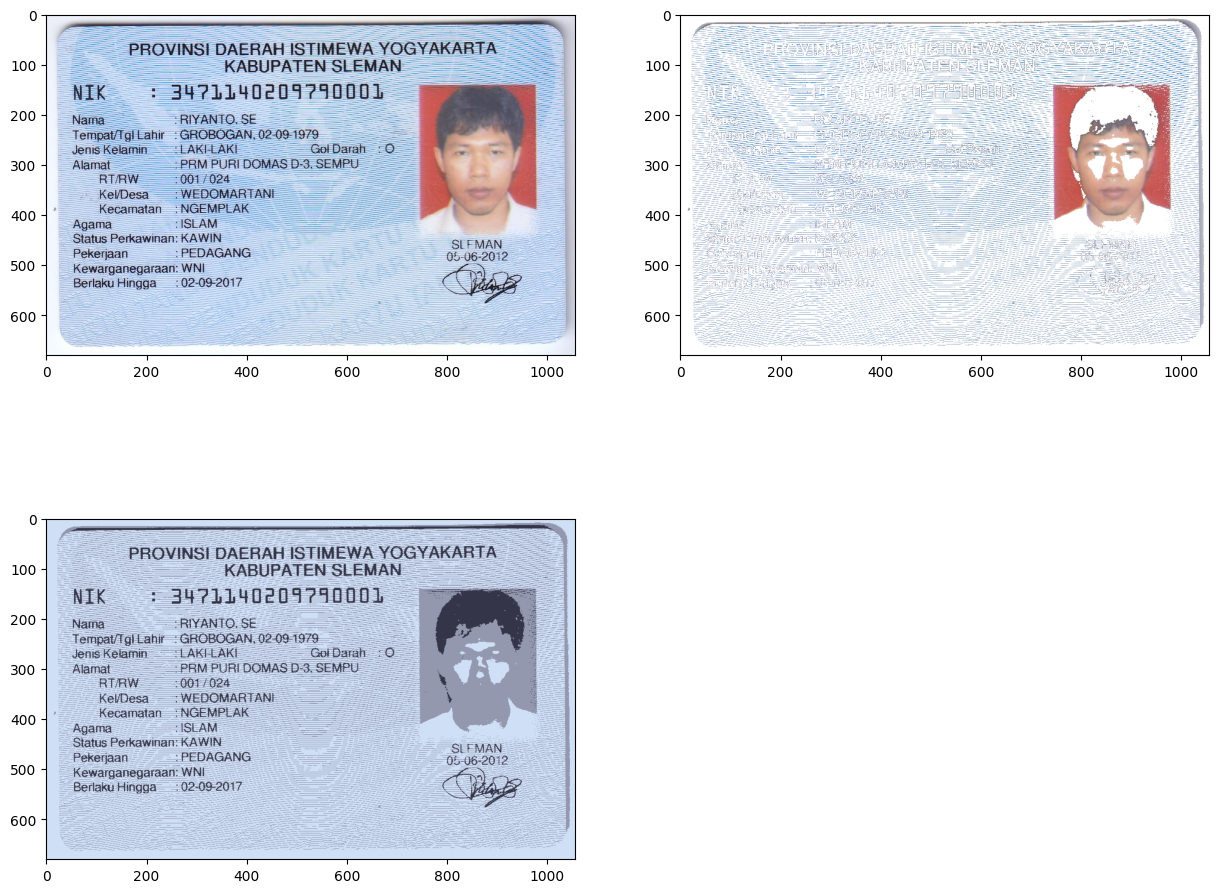

In [12]:
# Menentukan path dari gambar
path = ('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')
# Membaca gambar
img = cv2.imread(path)
# Mengubah gambar dari BGR ke RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengubah bentuk gambar menjadi satu dimensi dan mengubah tipe data menjadi float32
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Menentukan kriteria untuk algoritma k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Menentukan jumlah cluster
k = 3

# Melakukan segmentasi warna dengan algoritma k-means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Mengubah tipe data pusat cluster menjadi uint8
centers = np.uint8(centers)
# Mengubah bentuk label menjadi satu dimensi
labels = labels.flatten()
# Mengganti setiap pixel pada gambar dengan pusat clusternya
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

# Membuat salinan dari gambar asli
masked_image = np.copy(img)
# Mengubah bentuk gambar menjadi satu dimensi
masked_image0 = masked_image.reshape((-1, 3))
# Mengubah pixel yang bukan bagian dari cluster 1 menjadi putih
masked_image0[labels != 1] = [255, 255, 255]
# Mengembalikan bentuk gambar ke bentuk asli
masked_image0 = masked_image0.reshape(img.shape)

# Membuat figure
plt.figure(figsize = (15,12))
# Menampilkan gambar asli
plt.subplot(2,2,1),plt.imshow(img)
# Menampilkan gambar hasil masking
plt.subplot(2,2,2),plt.imshow(masked_image0)
# Menampilkan gambar hasil segmentasi
plt.subplot(2,2,3),plt.imshow(segmented_image)

# **E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**

## 1. Install PIP OCR

In [13]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (11.6 MB/s)
debconf: unable to init

## 2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

## 3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

## 4. Menambahkan kotak untuk deteksi teksi pada gambar

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pytesseract

Teks Hasil Pembacaan:
——————————
PROVINS! DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN 7
NIK  : 3471240209790001
Nama /RIYANTO. SE
Tempat/TgtLahir : GROBOGAN, 02-09-1979
Jens Kelamin :LAKILLAKI GolDarah :O ~~ oo.
Alamat : PRM PURI DOMAS D-3, SEMPU.
RTRW 2001 /024
KevDesa  : WEDOMARTANI oC
Kecamatan :NGEMPLAK '
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye
Kewarganegaraan: WNI >
Berlaku Hingga 02-09-2017 Ree



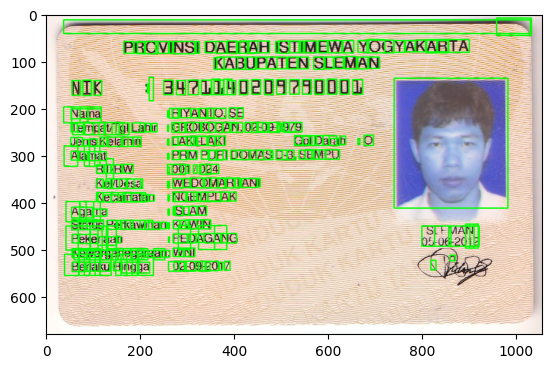

In [18]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')

# Mengubah gambar menjadi grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Melakukan blurring pada gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# Melakukan thresholding pada gambar dengan metode Otsu
thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Menentukan nilai alpha dan beta untuk penyesuaian kontras dan kecerahan
alpha = 1.5
beta = 0

# Menyesuaikan kontras dan kecerahan gambar
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)
# Menentukan konfigurasi untuk Tesseract
custom_config = r'--oem 3 --psm 6'
# Melakukan OCR pada gambar dengan Tesseract
detected_text = pytesseract.image_to_string(enhanced_image, config=custom_config)

# Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Mendapatkan ukuran gambar
h, w = enhanced_image.shape
# Mendapatkan bounding box untuk setiap karakter pada gambar
boxes = pytesseract.image_to_boxes(enhanced_image)

# Menggambar bounding box untuk setiap karakter pada gambar
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Menampilkan gambar dengan bounding box
plt.imshow(image)
plt.show()